In [1]:
#Importing Libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 100)

In [2]:
#reading Dataset
retail = pd.read_csv("Online Retail.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)

In [3]:
# parse date
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], format = "%d-%m-%Y %H:%M")

In [4]:
#dropping the na cells
order_wise = retail.dropna()

In [5]:
#RFM implementation
amount  = pd.DataFrame(order_wise.Quantity * order_wise.UnitPrice, columns = ["Amount"])

In [6]:
#merging amount in order_wise
order_wise = pd.concat(objs = [order_wise, amount], axis = 1, ignore_index = False)

In [7]:
#Monetary Function
monetary = order_wise.groupby("CustomerID").Amount.sum()
monetary = monetary.reset_index()

In [8]:
#Frequency function
frequency = order_wise[['CustomerID', 'InvoiceNo']]

k = frequency.groupby("CustomerID").InvoiceNo.count()
k = pd.DataFrame(k)
k = k.reset_index()
k.columns = ["CustomerID", "Frequency"]

In [9]:
#creating master dataset
master = monetary.merge(k, on = "CustomerID", how = "inner")

In [10]:
#Generating recency function
recency  = order_wise[['CustomerID','InvoiceDate']]
maximum = max(recency.InvoiceDate)
maximum = maximum + pd.DateOffset(days=1)
recency['diff'] = maximum - recency.InvoiceDate

#Dataframe merging by recency
df = pd.DataFrame(recency.groupby('CustomerID').diff.min())
df = df.reset_index()
df.columns = ["CustomerID", "Recency"]

C:\Users\H253015\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [11]:
RFM = k.merge(monetary, on = "CustomerID")
RFM = RFM.merge(df, on = "CustomerID")

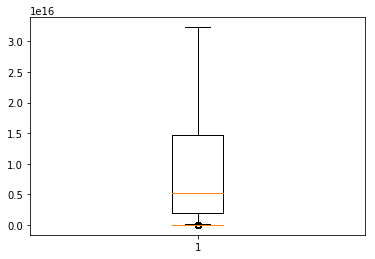

In [12]:
# outlier treatment for Amount
plt.boxplot(RFM.Amount)
Q1 = RFM.Amount.quantile(0.25)
Q3 = RFM.Amount.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Amount >= Q1 - 1.5*IQR) & (RFM.Amount <= Q3 + 1.5*IQR)]

# outlier treatment for Frequency
plt.boxplot(RFM.Frequency)
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]

# outlier treatment for Recency
plt.boxplot(RFM.Recency)
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

In [13]:
RFM.head()

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,326 days 02:33:00
2,12348.0,31,1797.24,75 days 23:37:00
3,12349.0,73,1757.55,19 days 02:59:00
4,12350.0,17,334.40,310 days 20:49:00
5,12352.0,95,1545.41,36 days 22:13:00


In [14]:
## Graded questions
cricket = pd.read_csv("Cricket.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)
cricket.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [15]:
cricket_df = cricket[['Player','Ave','SR']]
cricket_df.head()

,Player,Ave,SR
0,SR Tendulkar (INDIA),44.83,86.23
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86
2,RT Ponting (AUS/ICC),42.03,80.39
3,ST Jayasuriya (Asia/SL),32.36,91.20
4,DPMD Jayawardene (Asia/SL),33.37,78.96


In [16]:
cricket_df.describe()

,Ave,SR
count,79.000000,79.000000
mean,38.523291,79.295316
std,5.919093,9.925307
min,23.570000,60.570000
25%,34.600000,73.725000
50%,37.870000,77.730000
75%,41.845000,85.180000
max,53.940000,117.000000


In [17]:
player_df = pd.DataFrame(cricket_df['Player'])

In [18]:
cricket_df = cricket_df.drop('Player',axis=1)

In [19]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
cricket_df = pd.DataFrame(standard_scaler.fit_transform(cricket_df))
cricket_df.columns = ['Ave','SR']

In [10]:
cricket_df = pd.concat([player_df,cricket_df], axis=1)

In [83]:
players = ['V Kohli (INDIA)','ST Jayasuriya (Asia/SL)','SR Tendulkar (INDIA)','CH Gayle (ICC/WI)','Yuvraj Singh (Asia/INDIA)']
cricket_df.loc[[0,3,17,20,25]]

,Player,Ave,SR
0,SR Tendulkar (INDIA),1.072294,0.703152
3,ST Jayasuriya (Asia/SL),-1.047909,1.207091
17,CH Gayle (ICC/WI),-0.202889,0.589588
20,Yuvraj Singh (Asia/INDIA),-0.335508,0.849162
25,V Kohli (INDIA),2.621216,1.185798


In [90]:
# Kmeans with K=4
model_clus5 = KMeans(n_clusters = 4, max_iter=50)
model_clus5.fit(cricket_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [91]:
cricket_km = pd.concat([player_df, cricket_df, pd.Series(model_clus5.labels_)], axis=1)

In [92]:
cricket_km.loc[[0,3,17,20,25]]

,Player,Ave,SR,0
0,SR Tendulkar (INDIA),1.072294,0.703152,3
3,ST Jayasuriya (Asia/SL),-1.047909,1.207091,1
17,CH Gayle (ICC/WI),-0.202889,0.589588,1
20,Yuvraj Singh (Asia/INDIA),-0.335508,0.849162,1
25,V Kohli (INDIA),2.621216,1.185798,3


In [108]:
km_clusters_AVE = pd.DataFrame(cricket_km.groupby([0]).Ave.mean())
km_clusters_SR = pd.DataFrame(cricket_km.groupby([0]).SR.mean())
df = pd.concat([pd.Series(['D','C','B','A']), pd.Series([0,1,2,3]), km_clusters_SR, km_clusters_AVE], axis=1)
df.columns = ["Cluster", "ClusterID", "SR_mean", "Ave_mean"]
df.head()

,Cluster,ClusterID,SR_mean,Ave_mean
0,D,0,-0.359294,0.503468
1,C,1,1.508830,-0.529477
2,B,2,-0.535421,-0.777680
3,A,3,0.910338,1.874242


In [106]:
cricket_km

,Player,Ave,SR,0
0,SR Tendulkar (INDIA),1.072294,0.703152,3
1,KC Sangakkara (Asia/ICC/SL),0.587725,-0.044139,0
2,RT Ponting (AUS/ICC),0.596226,0.110997,0
3,ST Jayasuriya (Asia/SL),-1.047909,1.207091,1
4,DPMD Jayawardene (Asia/SL),-0.876185,-0.034000,2
5,Inzamam-ul-Haq (Asia/PAK),0.169465,-0.512591,0
6,JH Kallis (Afr/ICC/SA),0.992383,-0.649476,0
7,SC Ganguly (Asia/INDIA),0.424501,-0.567345,0
8,R Dravid (Asia/ICC/INDIA),0.108256,-0.816780,0
9,BC Lara (ICC/WI),0.332688,0.021768,0


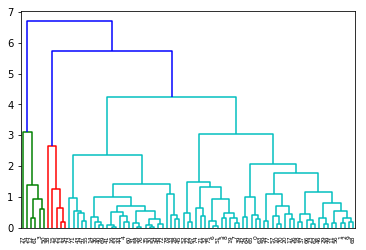

In [20]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
mergings = linkage(cricket_df, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [21]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
cricket_hc = pd.concat([player_df, cricket_df, clusterCut], axis=1)
cricket_hc.columns = ['Player', 'Ave', 'SR', 'ClusterID']

In [25]:
RFM_hc.loc[[0,3,7,8,17,20,24,25]]

,Player,Ave,SR,ClusterID
0,SR Tendulkar (INDIA),1.072294,0.703152,0
3,ST Jayasuriya (Asia/SL),-1.047909,1.207091,1
7,SC Ganguly (Asia/INDIA),0.424501,-0.567345,0
8,R Dravid (Asia/ICC/INDIA),0.108256,-0.816780,0
17,CH Gayle (ICC/WI),-0.202889,0.589588,0
20,Yuvraj Singh (Asia/INDIA),-0.335508,0.849162,0
24,V Sehwag (Asia/ICC/INDIA),-0.590544,2.538425,1
25,V Kohli (INDIA),2.621216,1.185798,3
